In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
raw_compiled_df = pd.read_csv('../data/final_data/cleaned_compiled_data.csv', index_col=False)

In [12]:
raw_compiled_df

Timestamp  rainfall_S104  rainfall_S107  rainfall_S109  \
0      2021-03-01 12:20:00+08:00            0.0            0.0            0.0   
1      2021-03-01 12:25:00+08:00            0.0            0.0            0.0   
2      2021-03-01 12:30:00+08:00            0.0            0.0            0.0   
3      2021-03-01 12:35:00+08:00            0.0            0.0            0.0   
4      2021-03-01 12:40:00+08:00            0.0            0.0            0.0   
...                          ...            ...            ...            ...   
221364 2024-12-06 17:00:00+08:00            0.0            0.0            0.0   
221365 2024-12-06 17:05:00+08:00            0.0            0.0            0.0   
221366 2024-12-07 16:05:00+08:00            0.0            0.0            0.0   
221367 2024-12-07 16:10:00+08:00            0.0            0.0            0.0   
221368 2024-12-07 16:15:00+08:00            0.0            0.0            0.0   

        rainfall_S115  rainfall_S116  rainfall_S24  rainfall_S43  \
0                 0.0            0.0           0.0           0.0   
1                 0.0            0.0           0.0           0.0   
2                 0.0            0.0           0.0           0.0   
3                 0.0            0.0           0.0           0.0   
4                 0.0            0.0           0.0           0.0   
...               ...            ...           ...           ...   
221364            0.0            0.0           0.0           0.0   
221365            0.0            0.0           0.0           0.0   
221366            0.0            0.0           0.0           0.0   
221367            0.0            0.0           0.0           0.0   
221368            0.0            0.0           0.0           0.0   

        rainfall_S50  air_temperature_S104  ...  relative_humidity_S50  \
0                0.0                  31.3  ...                   58.7   
1                0.0                  31.6  ...                   58.1   
2                0.0                  31.9  ...                   58.4   
3                0.0                  32.1  ...                   53.9   
4                0.0                  32.0  ...                   53.2   
...              ...                   ...  ...                    ...   
221364           0.0                  31.9  ...                   50.7   
221365           0.0                  32.0  ...                   51.5   
221366           0.0                  33.6  ...                   42.2   
221367           0.0                  33.5  ...                   40.7   
221368           0.0                  33.8  ...                   40.9   

        wind_direction_S104  wind_direction_S107  wind_direction_S109  \
0                      33.0                 90.0                102.0   
1                      52.0                 96.0                105.0   
2                      72.0                 95.0                 97.0   
3                      67.0                 98.0                 85.0   
4                      68.0                 98.0                126.0   
...                     ...                  ...                  ...   
221364                262.0                234.0                265.0   
221365                259.0                249.0                266.0   
221366                271.0                260.0                275.0   
221367                271.0                253.0                277.0   
221368                268.0                248.0                274.0   

        wind_direction_S115  wind_direction_S116  wind_direction_S24  \
0                     355.0                217.0          351.000000   
1                     356.0                211.0          358.000000   
2                       4.0                197.0           23.000000   
3                     355.0                196.0           37.000000   
4                     348.0                202.0           40.000000   
...                     ...        

In [ ]:
data = raw_compiled_df

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

start_time = data['Timestamp'].min()
print(start_time)
end_time = data['Timestamp'].max()
print(end_time)

expected_timestamps = pd.date_range(start=start_time, end=end_time, freq='5min')

print(len(expected_timestamps))
print(len(data))
missing_timestamps = expected_timestamps.difference(data['Timestamp'])
print(len(missing_timestamps))

2021-03-01 12:20:00+08:00
2024-12-07 16:15:00+08:00
396624
221369
175255


[[Timestamp('2021-03-07 13:55:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:00:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:05:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:10:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:15:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:20:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:25:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:30:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:35:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:40:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:45:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:50:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 14:55:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 15:00:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 15:05:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 15:10:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 15:15:00+0800', tz='UTC+08:00'), Timestamp('2021-03-07 15:20:00+0800', tz='UTC+08:00'), Timestam

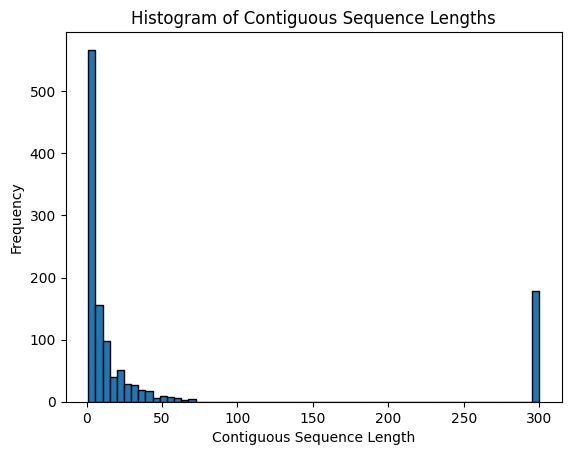

In [15]:
## find all contiguous timestamps for the missing timesteps
existing_timestamps = missing_timestamps
time_diff = existing_timestamps[1:] - existing_timestamps[:-1]

# find the start of each contiguous sequence
contiguous_sequences = []
current_sequence = [existing_timestamps[0]]
for i, diff in enumerate(time_diff):
    if diff == pd.Timedelta(minutes=5):
        current_sequence.append(existing_timestamps[i+1])
    else:
        contiguous_sequences.append(current_sequence)
        current_sequence = [existing_timestamps[i+1]]
contiguous_sequences.append(current_sequence)

seq_lengths = [len(seq) if len(seq) <= 72 else 300 for seq in contiguous_sequences]

print(contiguous_sequences)

# Plot a histogram of the contiguous sequence lengths
plt.hist(seq_lengths, bins=len(set(seq_lengths)), edgecolor='black')
plt.xlabel('Contiguous Sequence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Contiguous Sequence Lengths')
plt.show()